In [1]:

import PIL.Image
import PIL.ImageDraw
import requests
from io import BytesIO

from IPython.display import display
import face_recognition

In [2]:
#Load Image
response = requests.get("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.lyrn.ai%2Fwp-content%2Fuploads%2F2018%2F12%2FFaces-example-1366x877.jpg&f=1&nofb=1")
fr_image = face_recognition.load_image_file(BytesIO(response.content))

In [3]:
#Identify Faces
face_locations = face_recognition.face_locations(fr_image)

number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

I found 23 face(s) in this photograph.


In [12]:
pil_image = PIL.Image.fromarray(fr_image)

for face_location in face_locations:
    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="black")

A face is located at pixel location Top: 512, Left: 1156, Bottom: 641, Right: 1285
A face is located at pixel location Top: 82, Left: 1156, Bottom: 211, Right: 1285
A face is located at pixel location Top: 727, Left: 1156, Bottom: 856, Right: 1285
A face is located at pixel location Top: 512, Left: 311, Bottom: 641, Right: 440
A face is located at pixel location Top: 297, Left: 1156, Bottom: 426, Right: 1285
A face is located at pixel location Top: 725, Left: 748, Bottom: 832, Right: 856
A face is located at pixel location Top: 82, Left: 526, Bottom: 211, Right: 655
A face is located at pixel location Top: 307, Left: 533, Bottom: 414, Right: 641
A face is located at pixel location Top: 297, Left: 311, Bottom: 426, Right: 440
A face is located at pixel location Top: 727, Left: 311, Bottom: 856, Right: 440
A face is located at pixel location Top: 725, Left: 533, Bottom: 832, Right: 641
A face is located at pixel location Top: 512, Left: 526, Bottom: 641, Right: 655
A face is located at p

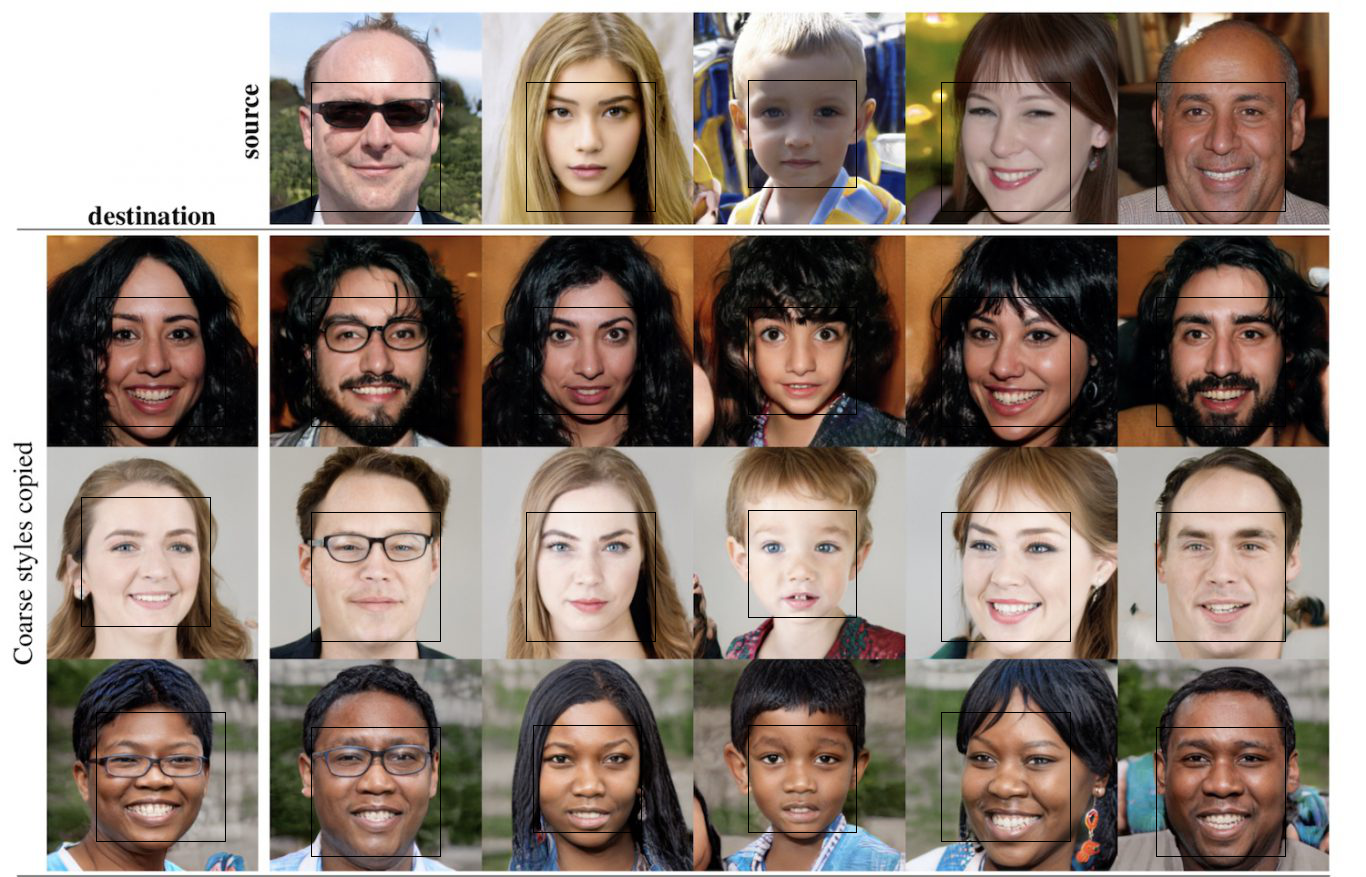

In [5]:
display(pil_image)

In [6]:
#Face Encodings
face_encodings = face_recognition.face_encodings(fr_image)
face_encodings[2]

array([-0.14784336,  0.10699735,  0.11859169,  0.0532105 , -0.02251319,
       -0.06058935, -0.01799919, -0.12869699,  0.11553515, -0.0639919 ,
        0.31258085, -0.04985609, -0.15800066, -0.14655638,  0.09842762,
        0.13097142, -0.14123046, -0.08508397, -0.07123073, -0.05848852,
        0.01973258,  0.01880182,  0.00276264,  0.07054957, -0.04497808,
       -0.32937127, -0.10413904, -0.17733507,  0.07923683, -0.09614085,
       -0.04699173,  0.04459137, -0.17773613, -0.03470529, -0.06002912,
        0.02061736,  0.04297918, -0.0213457 ,  0.20714433, -0.02030707,
       -0.15703022, -0.04179738, -0.04088251,  0.27596012,  0.1399992 ,
        0.00358111, -0.02645237,  0.03835624,  0.07282741, -0.20934837,
        0.07794287,  0.11547313,  0.18214595,  0.00409985, -0.01139537,
       -0.12899558, -0.04951947,  0.02299241, -0.18964507,  0.00726146,
        0.1110156 , -0.10296348, -0.17918879, -0.07087874,  0.2854335 ,
        0.15847747, -0.10790993, -0.14378436,  0.14764175, -0.07

In [8]:
#face comparing
face_recognition.compare_faces([face_encodings[0], face_encodings[0]], face_encodings[0], tolerance=0.08)



[True, True]

In [9]:
face_landmarks_list = face_recognition.face_landmarks(fr_image)
print(face_landmarks_list)

541), (329, 534), (341, 531), (354, 531), (366, 535)], 'right_eyebrow': [(382, 536), (392, 531), (404, 530), (414, 531), (422, 538)], 'nose_bridge': [(375, 544), (375, 553), (375, 562), (376, 572)], 'nose_tip': [(364, 580), (370, 583), (376, 584), (382, 582), (387, 580)], 'left_eye': [(337, 548), (344, 546), (351, 546), (357, 548), (351, 549), (344, 549)], 'right_eye': [(390, 548), (397, 546), (404, 546), (410, 548), (404, 549), (397, 549)], 'top_lip': [(348, 601), (360, 599), (370, 597), (376, 598), (382, 596), (391, 599), (400, 602), (396, 603), (383, 602), (376, 603), (370, 602), (353, 602)], 'bottom_lip': [(400, 602), (390, 608), (382, 610), (376, 610), (369, 610), (360, 607), (348, 601), (353, 602), (369, 602), (376, 603), (382, 602), (396, 603)]}, {'chin': [(1169, 340), (1168, 356), (1168, 372), (1170, 388), (1175, 404), (1183, 418), (1194, 430), (1208, 440), (1225, 443), (1243, 441), (1256, 431), (1268, 418), (1277, 403), (1283, 387), (1285, 370), (1286, 354), (1285, 339)], 'lef

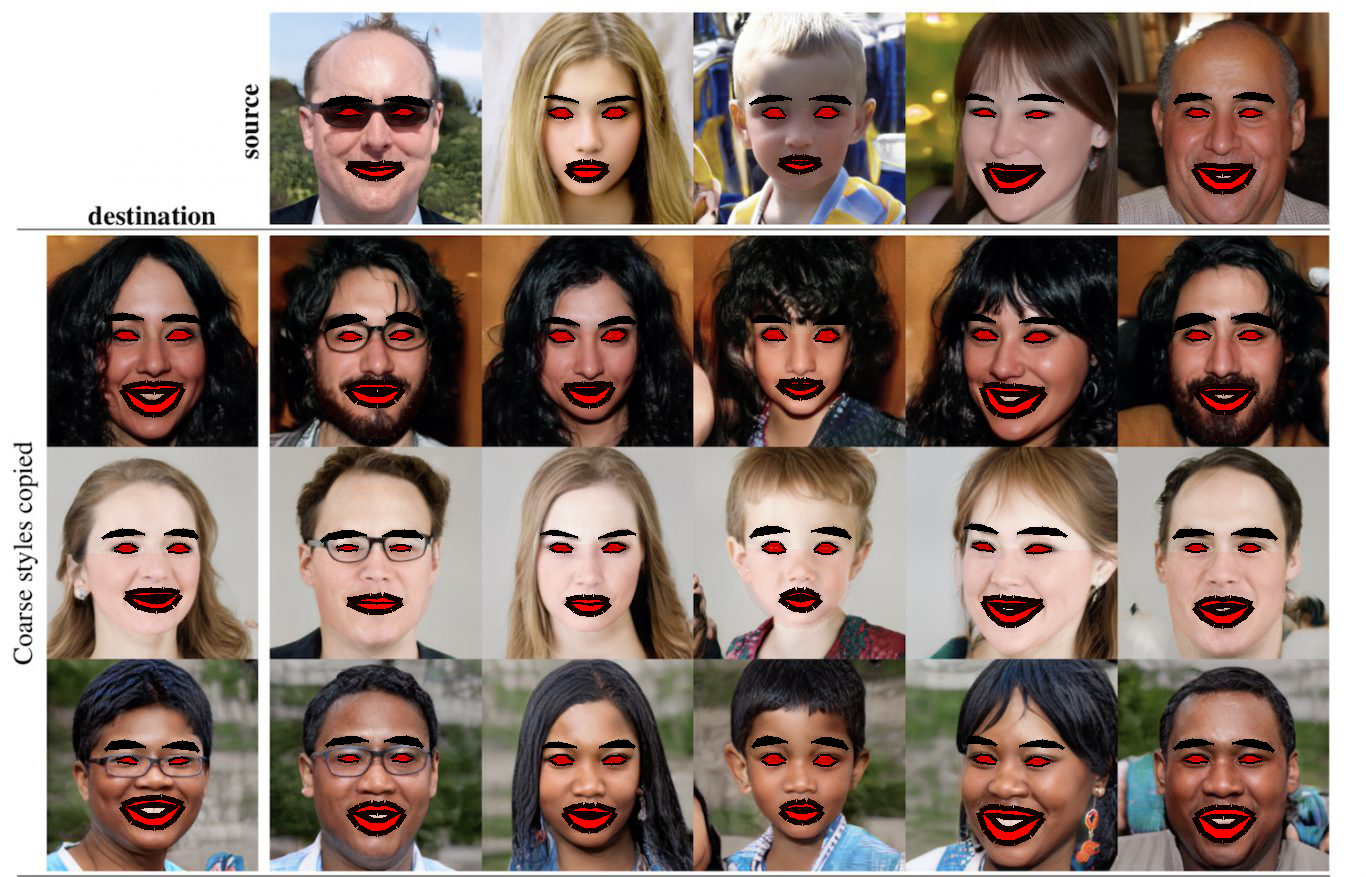

In [13]:
pil_image = PIL.Image.fromarray(fr_image)
for face_landmarks in face_landmarks_list:
    
    d = PIL.ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.line(face_landmarks['left_eyebrow'], fill=(0, 0, 0, 255), width=3)
    d.line(face_landmarks['right_eyebrow'], fill=(0, 0, 0, 255), width=3)
    d.polygon(face_landmarks['left_eyebrow'], fill=(0, 0, 0, 255))
    d.polygon(face_landmarks['right_eyebrow'], fill=(0, 0, 0, 255))

    # Gloss the lips
    d.line(face_landmarks['top_lip'], fill=(0, 0, 0, 255), width=10)
    d.line(face_landmarks['bottom_lip'], fill=(0, 0, 0, 255), width=10)

    d.polygon(face_landmarks['bottom_lip'], fill=(255, 0, 0, 255))
    d.polygon(face_landmarks['top_lip'], fill=(255, 0, 0, 255))
    d.line(face_landmarks['top_lip'], fill=(0, 0, 0, 255), width=2)
    d.line(face_landmarks['bottom_lip'], fill=(0, 0, 0, 255), width=2)

    # Chin
    d.polygon(face_landmarks['chin'], fill=(255, 0, 0, 16))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(10, 0, 0, 255), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(10, 0, 0, 255), width=6)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 0, 0, 200))
    d.polygon(face_landmarks['right_eye'], fill=(255, 0, 0, 200))

display(pil_image)